In [ ]:
import pandas_datareader as pd

In [ ]:
df= pd.get_data_tiingo("AAPL", api_key='##########')

In [ ]:
df.to_csv("AAPL.csv")

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("AAPL.csv")

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-04 00:00:00+00:00,94.19,95.90,93.82,95.20,41025475,21.897926,22.295478,21.811906,22.132737,164101900,0.00,1.0
1,AAPL,2016-05-05 00:00:00+00:00,93.24,94.07,92.68,94.00,35890500,21.809581,22.003724,21.678592,21.987351,143562000,0.57,1.0
2,AAPL,2016-05-06 00:00:00+00:00,92.72,93.45,91.85,93.37,43699886,21.687949,21.858701,21.484449,21.839989,174799544,0.00,1.0
3,AAPL,2016-05-09 00:00:00+00:00,92.79,93.77,92.59,93.00,32936436,21.704322,21.933552,21.657541,21.753443,131745744,0.00,1.0
4,AAPL,2016-05-10 00:00:00+00:00,93.42,93.57,92.11,93.33,33686836,21.851684,21.886770,21.545265,21.830632,134747344,0.00,1.0


In [ ]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-26 00:00:00+00:00,134.72,135.06,133.560,134.83,66905069,134.72,135.06,133.560,134.83,66905069,0.0,1.0
1253,AAPL,2021-04-27 00:00:00+00:00,134.39,135.41,134.110,135.01,66015804,134.39,135.41,134.110,135.01,66015804,0.0,1.0
1254,AAPL,2021-04-28 00:00:00+00:00,133.58,135.02,133.080,134.31,107760097,133.58,135.02,133.080,134.31,107760097,0.0,1.0
1255,AAPL,2021-04-29 00:00:00+00:00,133.48,137.07,132.450,136.47,151100953,133.48,137.07,132.450,136.47,151100953,0.0,1.0
1256,AAPL,2021-04-30 00:00:00+00:00,131.46,133.56,131.065,131.78,109839466,131.46,133.56,131.065,131.78,109839466,0.0,1.0


In [ ]:

!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (1257, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  1
    14 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


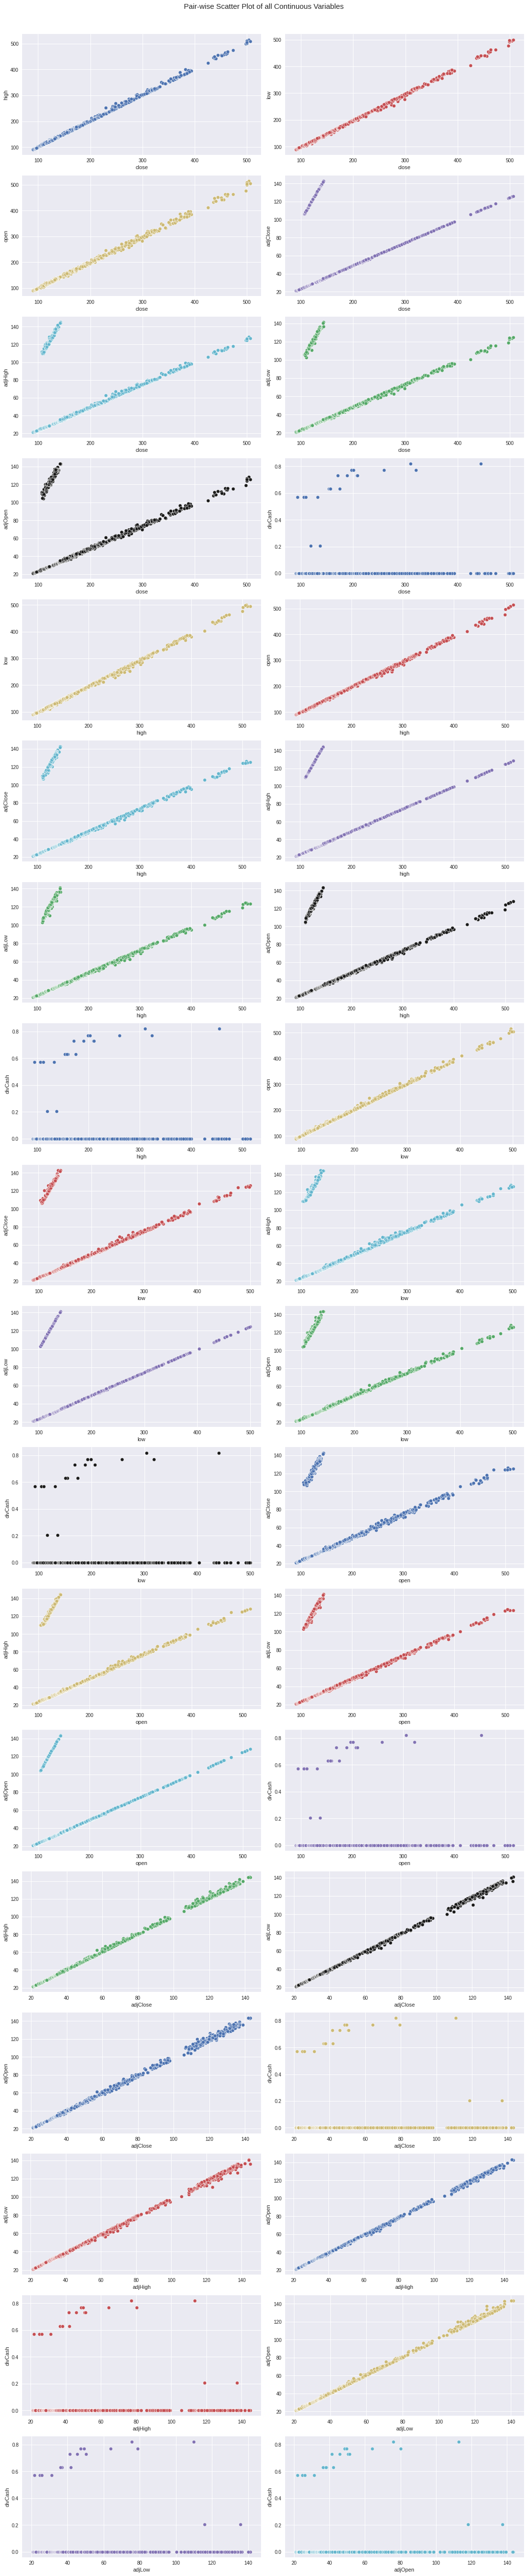

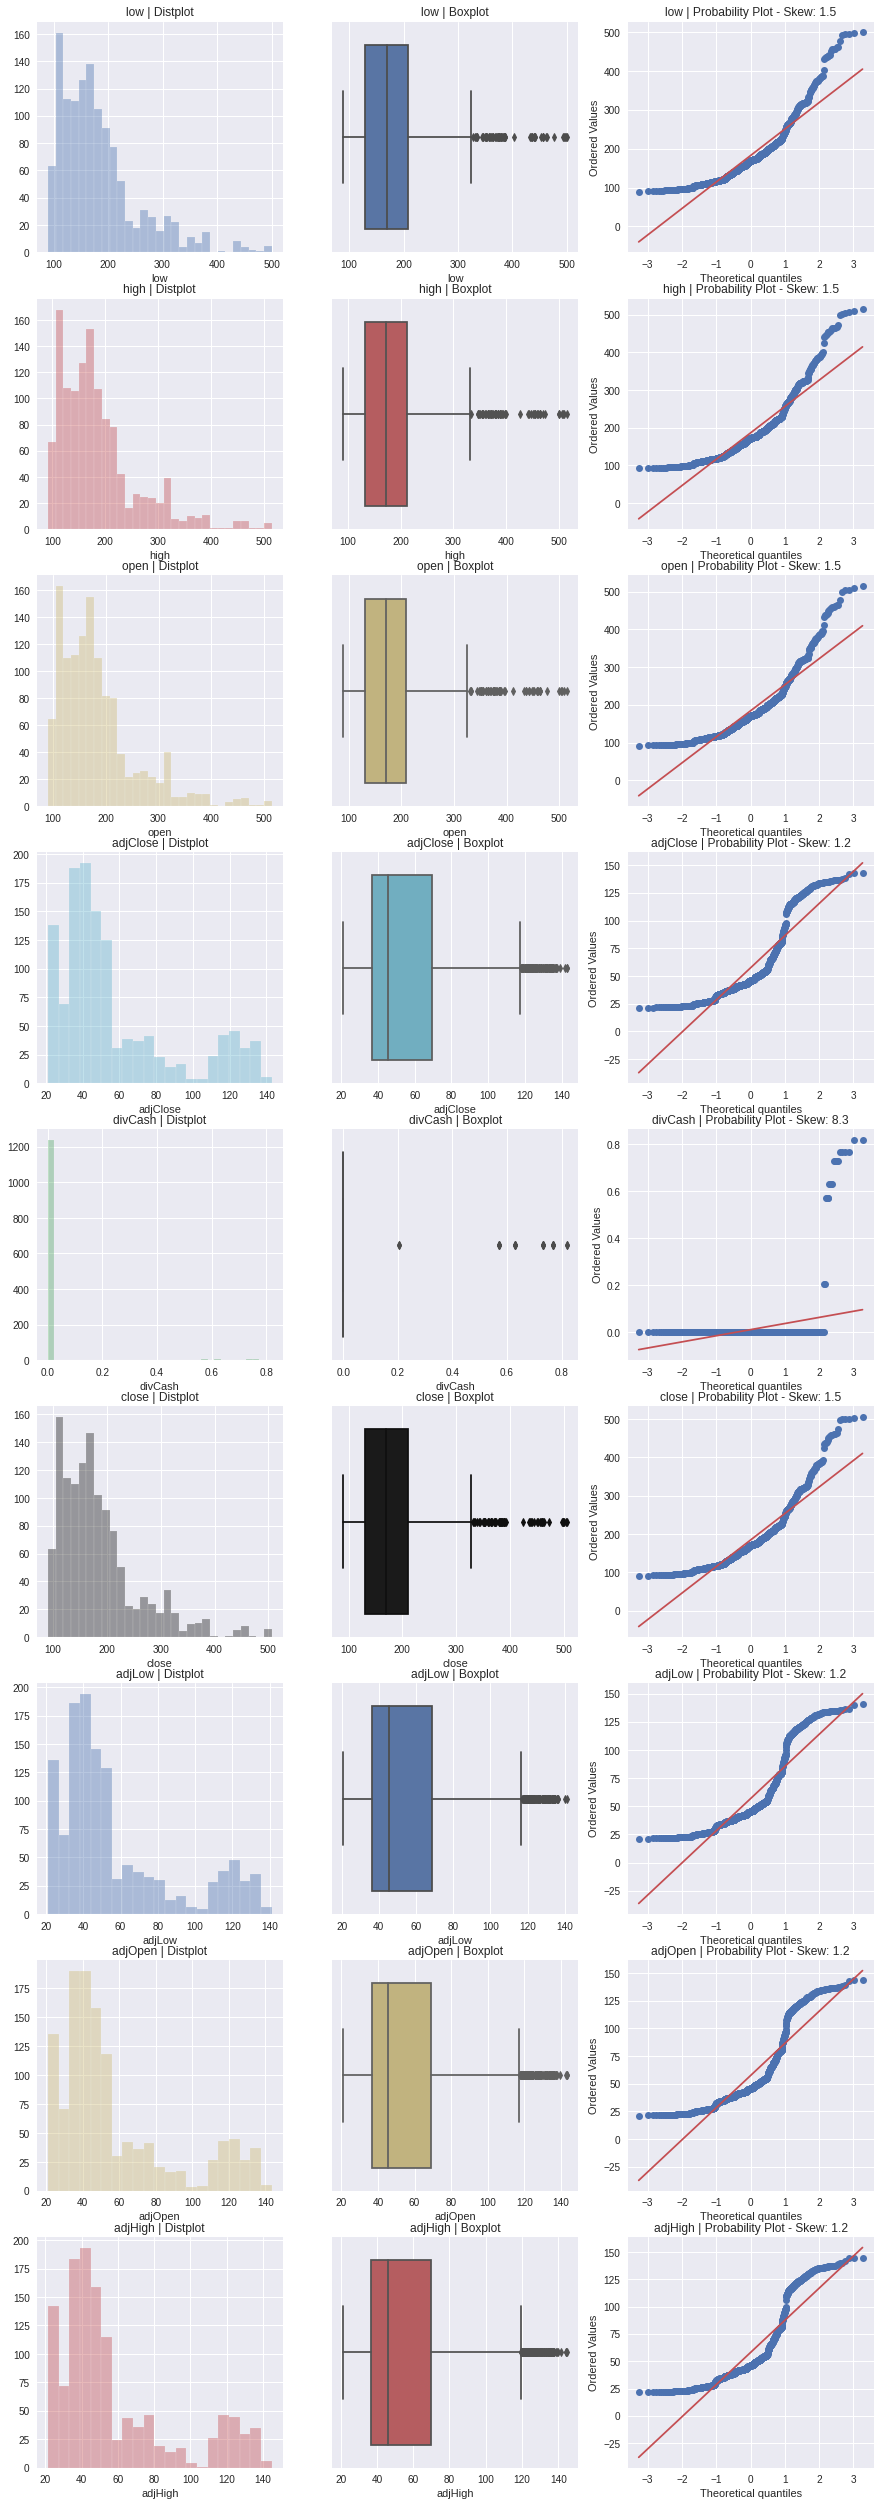

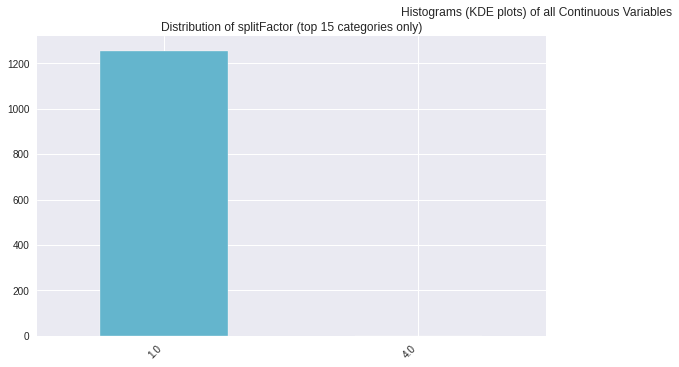

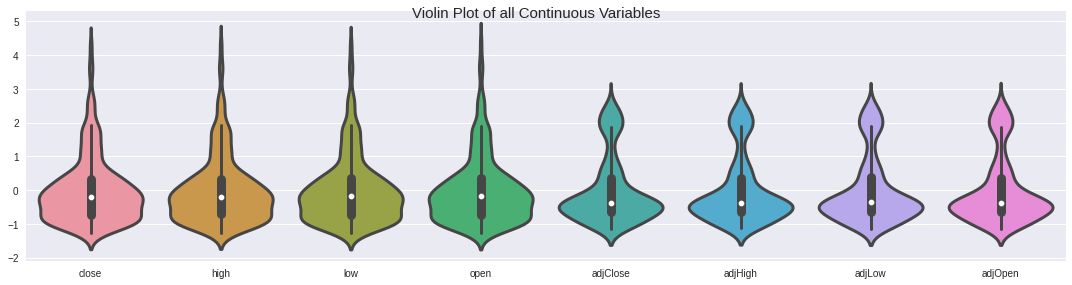

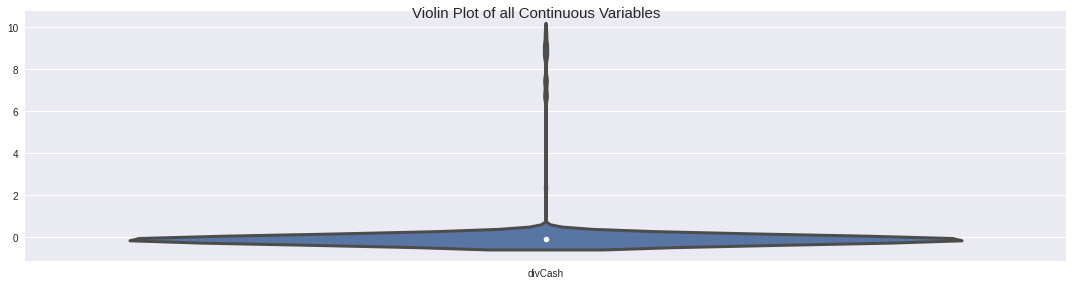

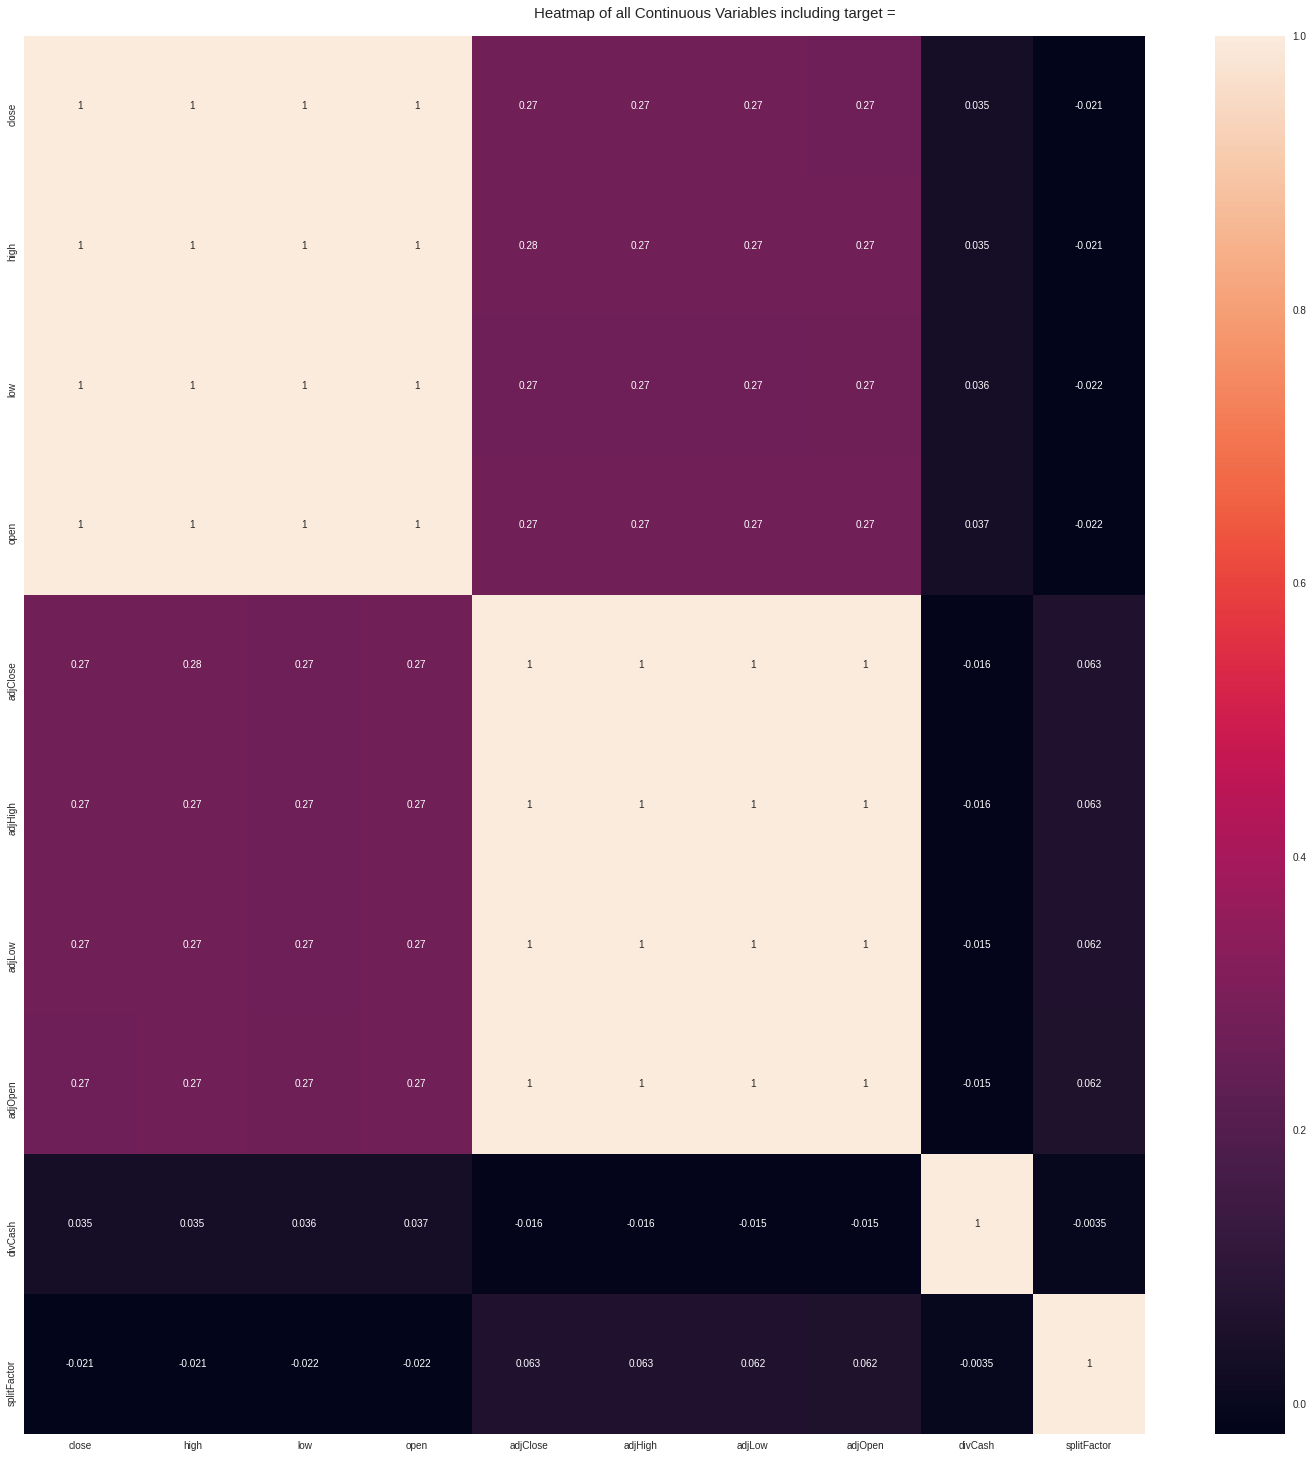

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 22.814

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = "AAPL.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [ ]:
df1=data.reset_index()['close']

In [ ]:
df1.head()

0    94.19
1    93.24
2    92.72
3    92.79
4    93.42
Name: close, dtype: float64

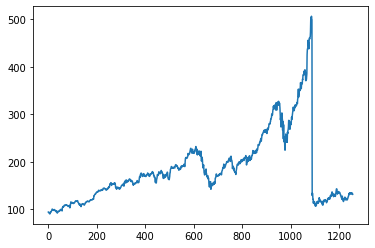

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0        94.19
1        93.24
2        92.72
3        92.79
4        93.42
         ...  
1252    134.72
1253    134.39
1254    133.58
1255    133.48
1256    131.46
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
len(train_data),len(test_data)

(817, 440)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 310ms/step - loss: 0.0187 - val_loss: 0.0490
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0028 - val_loss: 0.0231
Epoch 3/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0012 - val_loss: 0.0224
Epoch 4/100
12/12 [==============================] - 2s 201ms/step - loss: 5.9698e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 2s 197ms/step - loss: 4.2627e-04 - val_loss: 0.0188
Epoch 6/100
12/12 [==============================] - 2s 204ms/step - loss: 4.0341e-04 - val_loss: 0.0185
Epoch 7/100
12/12 [==============================] - 3s 212ms/step - loss: 3.5828e-04 - val_loss: 0.0182
Epoch 8/100
12/12 [==============================] - 2s 209ms/step - loss: 3.3923e-04 - val_loss: 0.0179
Epoch 9/100
12/12 [==============================] - 3s 210ms/step - loss: 3.8625e-04 - val_loss: 0.0177
Epoch 10/100
12/12 [==============================] - 2s 207ms/step

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

170.9451349866133

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

244.99414852251277

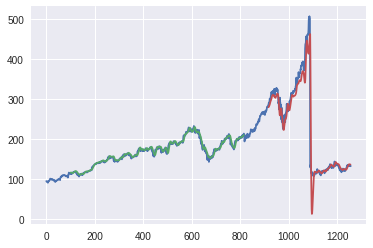

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()